<a href="https://colab.research.google.com/github/anaipsilva/TESE/blob/main/cnn_primeira_vggnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import keras as keras
import matplotlib.pyplot as plt
import csv
import numpy as np
import sys

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
import keras_tuner as kt

In [ ]:
#train_df=pd.read_csv("/content/drive/MyDrive/TESE/X_train.csv")
#valid_df=pd.read_csv("/content/drive/MyDrive/TESE/X_test.csv")

In [ ]:
data_df=pd.read_csv("/content/drive/MyDrive/TESE/X_data.csv")

In [ ]:
data=data_df.values

In [ ]:
#x_train=train_df.values
#x_valid=valid_df.values

In [ ]:
#print(x_train.shape)
data.shape

(18120, 10000)

In [ ]:
#ytrain_df=pd.read_csv("/content/drive/MyDrive/TESE/Labels_train.csv")
#yvalid_df=pd.read_csv("/content/drive/MyDrive/TESE/Labels_test_teste.csv", header=None)

In [ ]:
labels_df=pd.read_csv("/content/drive/MyDrive/TESE/Labels.csv", header=0)

In [ ]:
labels=labels_df['Labels'].values

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(data,labels, test_size=0.30, random_state=25)

In [ ]:
#y_train=ytrain_df['Labels'].values
#y_valid=yvalid_df['Labels'].values

In [ ]:
x_train.shape

(12684, 10000)

In [ ]:
y_valid[1]

0

In [ ]:
conta0=0
conta1=0
for i in range(len(y_train)):
  if y_train[i] == 0:
    conta0=conta0+1
  elif y_train[i] == 1:
    conta1=conta1+1
print(conta0)
print(conta1)

3488
9196


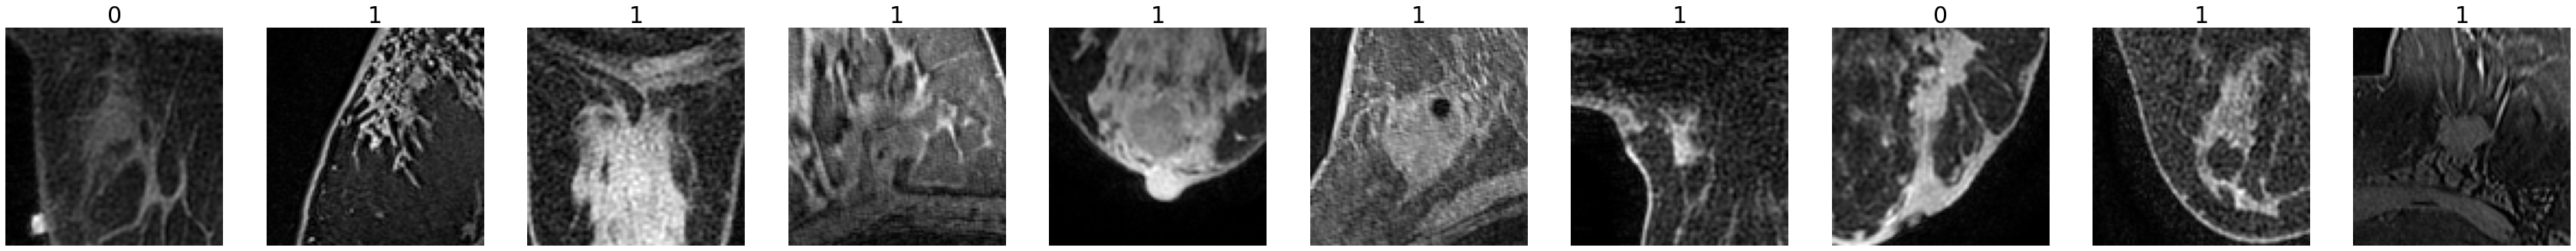

In [ ]:
plt.figure(figsize=(60,60))

num_images = 10
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]
    
    image = row.reshape(100,100)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [ ]:
x_train.min()

0

In [ ]:
x_train.max()

10492

In [ ]:
x_train=x_train / 10492
x_valid=x_valid / 10492

In [ ]:
x_train = x_train.reshape(-1,100,100,1)
x_valid = x_valid.reshape(-1,100,100,1)

In [ ]:
num_classes=2
if not y_train.shape[-1] == 2:
  y_train=keras.utils.np_utils.to_categorical(y_train, num_classes)
  y_valid=keras.utils.np_utils.to_categorical(y_valid, num_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu", input_shape=(100, 100, 1)))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding="same"))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding="same"))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding="same"))
model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(Flatten())
model.add(Dense(units=1024, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=True, # randomly flip images vertically
)  

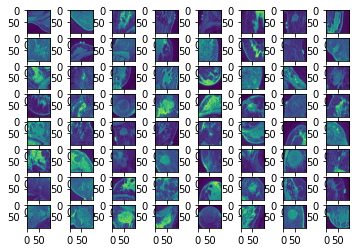

In [ ]:
batch_size = 64
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=8, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [ ]:
datagen.fit(x_train)

In [ ]:
#model = Sequential()
#model.add(Dense(units = 512, activation='relu', input_shape=(10000,)))
#model.add(Dense(units = 512, activation='relu'))
#model.add(Dense(units = num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 100, 100, 64)      640       
                                                                 
 conv2d_11 (Conv2D)          (None, 100, 100, 64)      36928     
                                                                 
 batch_normalization_3 (Batc  (None, 100, 100, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy', 
              metrics=keras.metrics.,
              optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001 ))

In [ ]:
history=model.fit(img_iter, epochs=10, steps_per_epoch=len(x_train)/batch_size, validation_data=(x_valid, y_valid))

Epoch 1/10
198/198 [==============================] - 50s 248ms/step - loss: 0.5911 - binary_accuracy: 0.7250 - val_loss: 0.5916 - val_binary_accuracy: 0.7215
Epoch 2/10
198/198 [==============================] - 49s 246ms/step - loss: 0.5901 - binary_accuracy: 0.7250 - val_loss: 0.5924 - val_binary_accuracy: 0.7215
Epoch 3/10
198/198 [==============================] - 49s 246ms/step - loss: 0.5909 - binary_accuracy: 0.7250 - val_loss: 0.5921 - val_binary_accuracy: 0.7215
Epoch 4/10
198/198 [==============================] - 49s 246ms/step - loss: 0.5896 - binary_accuracy: 0.7250 - val_loss: 0.5938 - val_binary_accuracy: 0.7215
Epoch 5/10
198/198 [==============================] - 48s 244ms/step - loss: 0.5899 - binary_accuracy: 0.7250 - val_loss: 0.5946 - val_binary_accuracy: 0.7215
Epoch 6/10
198/198 [==============================] - 53s 268ms/step - loss: 0.5894 - binary_accuracy: 0.7250 - val_loss: 0.5916 - val_binary_accuracy: 0.7215
Epoch 7/10
198/198 [==========================

KeyboardInterrupt: ignored

In [ ]:
#history=model.fit(x_train, y_train, epochs= 10, verbose=1, validation_data=(x_valid, y_valid))

In [ ]:
model.save('/content/drive/MyDrive/TESE/model_vgg2_meanerror')

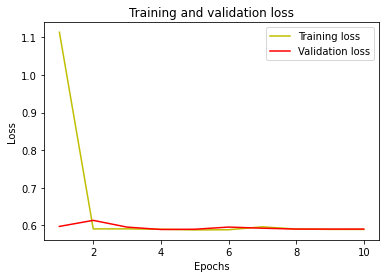

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

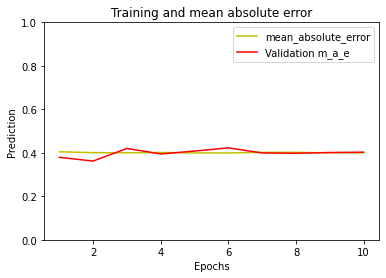

In [ ]:
precision_1 = history.history['mean_absolute_error']
val_precision_1 = history.history['val_mean_absolute_error']
ymin=0
ymax=1
plt.plot(epochs, precision_1, 'y', label='mean_absolute_error')
plt.plot(epochs, val_precision_1, 'r', label='Validation m_a_e')
plt.ylim([ymin, ymax])
plt.title('Training and mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('Prediction')
plt.legend()
plt.show()

1/1 [==============================] - 1s 529ms/step
The prediction for this image is:  [[0.28254157 0.7174584 ]]
The actual label for this image is:  [0. 1.]


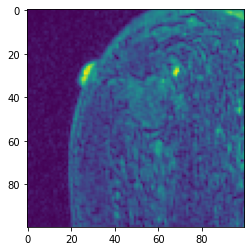

In [ ]:
n=1250  #Select the index of image to be loaded for testing
img = x_valid[n]
image = img.reshape(100,100)
plt.imshow(image)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_valid[n])